<a href="https://colab.research.google.com/github/priyoislam/Object_Detection_with_numpy/blob/main/color_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from IPython.display import Image
from skimage import io
import timeit

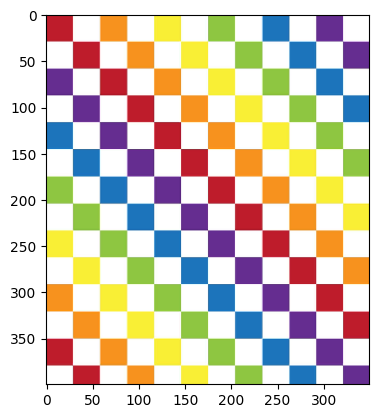

In [2]:
photo1=io.imread("/content/drive/MyDrive/Colab Notebooks/check.jpg")
photo=photo1[::4,::4]
plt.imshow(photo)

In [3]:
target_color=photo[0,0]
target_color_1D=(target_color[0]*65536)+(target_color[1]*256)+target_color[2]
print(target_color)
print(target_color_1D)

[190  28  43]
12459051


In [4]:
def one_dimentional_approach():


    def rgbconvert(combined_rgb):
            r = (combined_rgb // 65536).astype(np.uint8)
            g = ((combined_rgb % 65536) // 256).astype(np.uint8)
            b = (combined_rgb % 256).astype(np.uint8)

            # Stack the R, G, and B channels to create the original image
            restored_image = np.stack([r, g, b], axis=-1)

            return restored_image

    r,g,b=photo[:,:,0],photo[:,:,1],photo[:,:,2]
    photo_1D=(r*65536)+(g*256)+b
    white=255*65536+255*256+255
    condition = (photo_1D-target_color_1D) < 1000
    detected_color_1D=np.copy(photo_1D)
    detected_color_1D[~condition]=white
    resultimage=rgbconvert(detected_color_1D)

    plt.imshow(resultimage)

In [5]:
def euclidean_distance_approach():

    squared_differences = np.sum((photo - target_color)**2, axis=-1)

    # Take the square root of the sum to get the Euclidean distance for each pixel
    euclidean_distances = np.sqrt(squared_differences)

    condition=euclidean_distances<5

    result=np.copy(photo)

    result[~condition]=[255, 255, 255]

    plt.imshow(result)

Execution Time for Euclidean Distance Approach: 0.029624 seconds


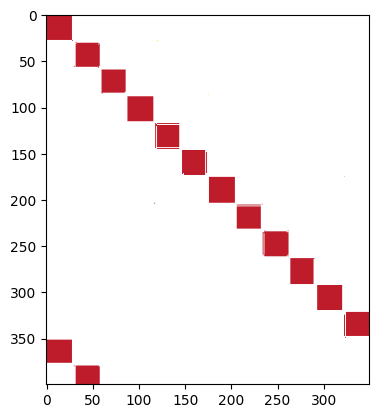

In [6]:
timer1 = timeit.Timer(euclidean_distance_approach)

# Run the code and measure the execution time
execution_time1 = timer1.timeit(number=10)  # number of repetitions
execution_time1/=10

print(f"Execution Time for Euclidean Distance Approach: {execution_time1:.6f} seconds")

Execution Time for One dimentional Calculation: 0.006971 seconds


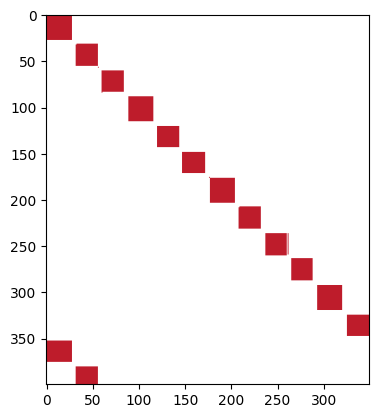

In [7]:
timer = timeit.Timer(one_dimentional_approach)

# Run the code and measure the execution time
execution_time = timer.timeit(number=10)  # number of repetitions
execution_time/=10

print(f"Execution Time for One dimentional Calculation: {execution_time:.6f} seconds")